Для решения задачи классификации я продолжаю использовать подготовленный ранее датасет. 

В файле Excel я создаю искуственную переменную-классификатор в значениях 1-высокая цена, 0-низкая цена; задав условие,что при значении цены >=128000 она определяется как высокая.

Дальнейшая подготовка данных аналогична предыдущей.

# Data Preprocessing

Сперва подключаю все необходимые для работы и предустановленные библиотеки, загружаю подготовленный в Excel файл.

In [278]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [279]:
# Importing the dataset
df = pd.read_csv('sr2.csv', sep=',')

Для наглядности выведем импортрованнные данные на экран; убедимся, что всё загрузилось должным образом.

Итак, имеем 11 стобцов переменных по 6019 строк записей.

In [280]:
df

,name,year,kilom,fuel,trans,owner,mileage,engine,power,seats,pricedol
0,"Audi A4 3,2 FSI Tiptronic Quattro",2012,125000,Petrol,Automatic,First,10.50,3197.0,NaN,0.0,1
1,Smart Fortwo CDI AT,2008,103000,Diesel,Automatic,Second,0.00,799.0,NaN,2.0,0
2,"Audi TT 2,0 TFSI",2014,14262,Petrol,Automatic,First,9.90,1984.0,207.8,2.0,1
3,"Audi TT 2,0 TFSI",2013,12100,Petrol,Automatic,First,9.90,1984.0,207.8,2.0,1
4,Porsche Boxster S tiptronic,2015,10512,Petrol,Automatic,First,8.60,2706.0,265.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
6014,BMW 5 Series 520d Sedan,2012,72000,Diesel,Automatic,Third,18.48,NaN,NaN,NaN,1
6015,BMW 5 Series 520d Sedan,2012,90000,Diesel,Automatic,First,18.48,NaN,NaN,NaN,1
6016,BMW 5 Series 520d Sedan,2014,64158,Diesel,Automatic,First,18.48,NaN,NaN,NaN,1
6017,BMW 5 Series 520d Sedan,2012,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,1


Выведем статистику по числовым переменным, где сразу увидим, что в переменных mileage, engine, power, seats, имеются пропущенные значения.

In [281]:
df.describe()

,year,kilom,mileage,engine,power,seats,pricedol
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,0.274464
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,0.446281
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.000000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,0.000000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,0.000000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,1.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,1.000000


Проведем проверку типов данных по переменным и выявим соответствие.

In [282]:
df.dtypes

name         object
year          int64
kilom         int64
fuel         object
trans        object
owner        object
mileage     float64
engine      float64
power       float64
seats       float64
pricedol      int64
dtype: object

Следующим этапом подготовки данных будет проверка на наличие пропущенных значений. Выведем общее количество и процент пропусков по переменным. Как было указано ранее, исходя из статистики, пропуски имееют seats, power, engine, mileage.

In [283]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
power,143,0.023758
seats,42,0.006978
engine,36,0.005981
mileage,2,0.000332
pricedol,0,0.000000
owner,0,0.000000
trans,0,0.000000
fuel,0,0.000000
kilom,0,0.000000
year,0,0.000000


С помощью написанной ниже функции для числовых переменных заполняем пропуски средними значениями.

In [284]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Записываем в наш датафрейм уже очищенные данные.

In [285]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

Повторно делаем проверку, которая указывает на отсутствие пропусков в данных

In [286]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
pricedol,0,0.0
seats,0,0.0
power,0,0.0
engine,0,0.0
mileage,0,0.0
owner,0,0.0
trans,0,0.0
fuel,0,0.0
kilom,0,0.0
year,0,0.0


In [287]:
df.describe()

,year,kilom,mileage,engine,power,seats,pricedol
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,0.274464
std,3.269742,9.126884e+04,4.581528,599.553865,53.231019,0.806012,0.446281
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.000000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,0.000000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,0.000000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,1.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,1.000000


Построим графики распределения функций. Для асимметричных данных проведем логарифмирование:'engine','pricedol',"kilom".

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


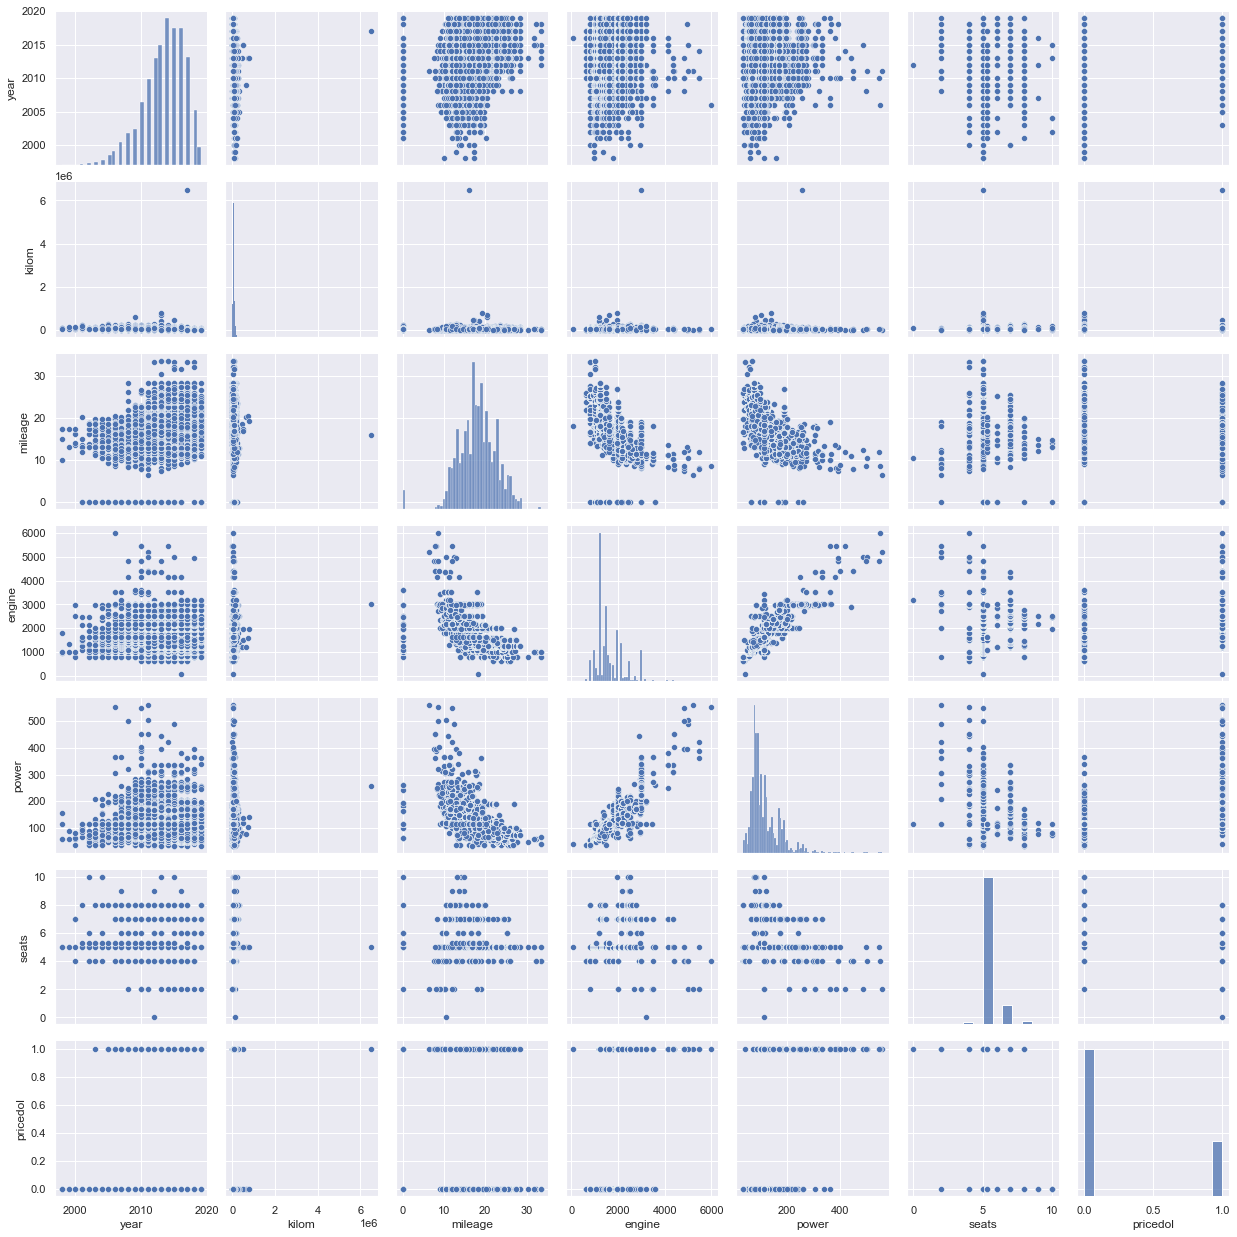

In [288]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Произведем преобразование для искаженных распределений и продемонстрируем результат.

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


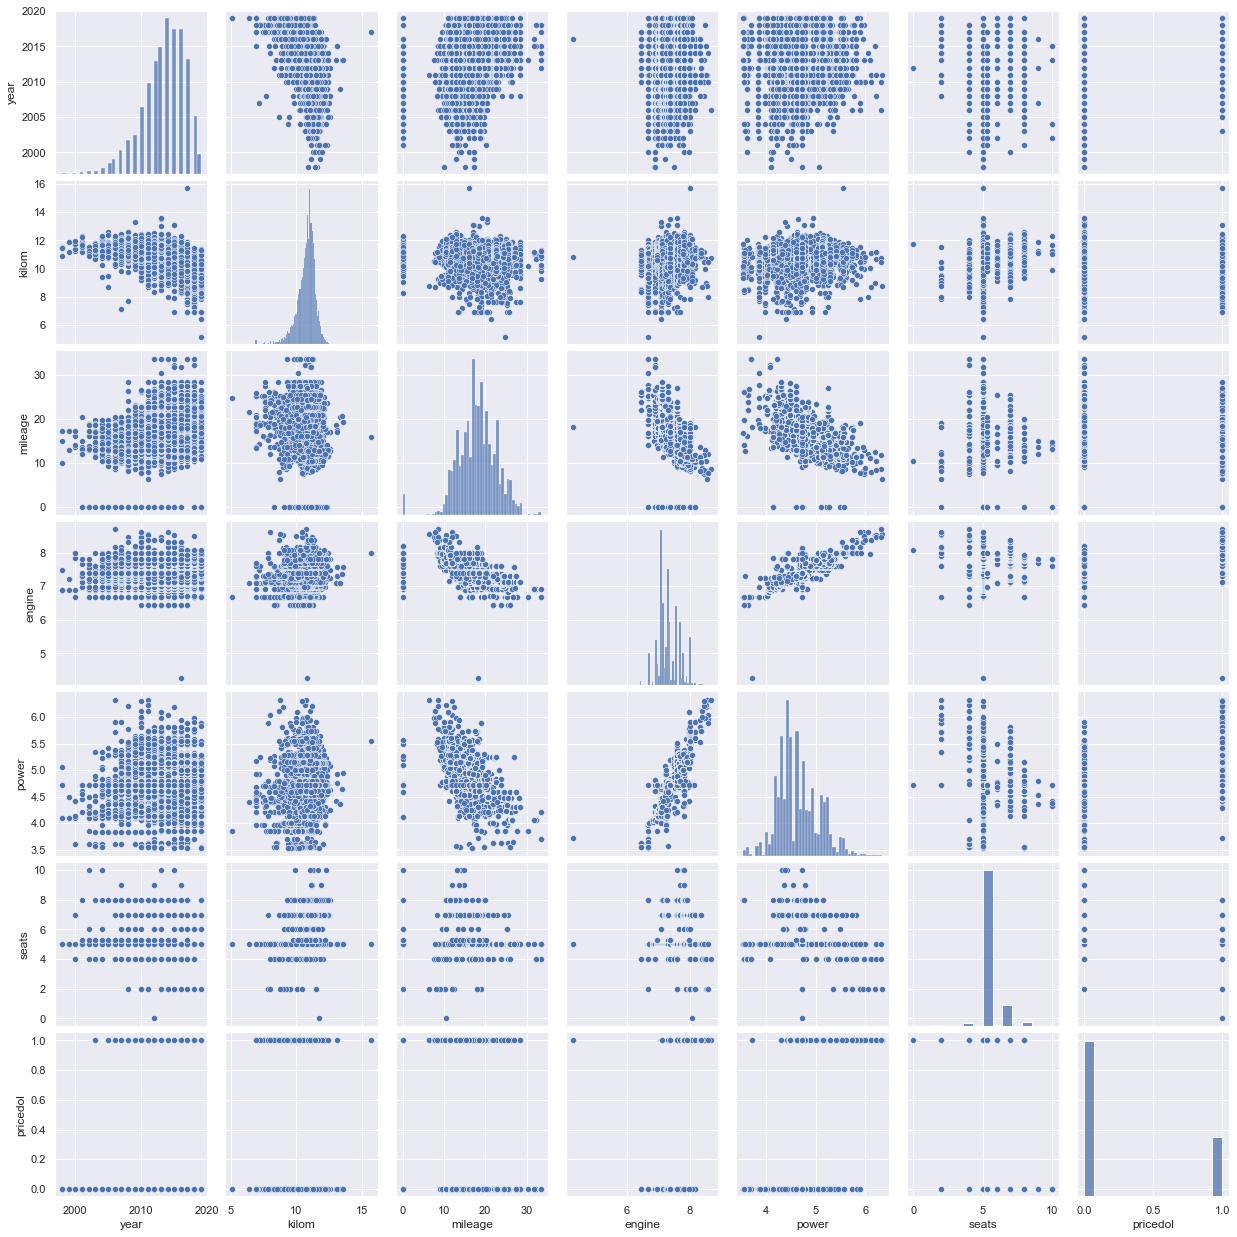

In [289]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['engine',"kilom","power"]] = np.log(df_1[['engine',"kilom","power"]])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

Осуществим работы с выбросами в числовых переменных: для этого запишем функцию для поиска и замены данных, выходящих за пределы 3 сигма.

In [290]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датафрейм уже очищенные от выбросов переменные и повторно выведем статистику. В результате выполнения очистки можно наблядать, что показатели максимального, минимального, среднего значений, а также стандартного отклонения изменились практически по всем переменным и теперь соответствуют нормальному распределению.

In [291]:
# Outliers
df = outliers(df)
df.describe()

,year,kilom,mileage,engine,power,seats,pricedol
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.374555,57460.396307,18.181014,1615.392295,112.378122,5.271512,0.274464
std,3.212293,35032.211954,4.393832,574.572565,49.287134,0.759818,0.446281
min,2003.548973,171.000000,4.390378,72.000000,34.200000,2.860699,0.000000
25%,2011.000000,34000.000000,15.170000,1198.000000,78.000000,5.000000,0.000000
50%,2014.000000,53000.000000,18.150000,1493.000000,98.600000,5.000000,0.000000
75%,2016.000000,73000.000000,21.100000,1969.000000,138.030000,5.000000,1.000000
max,2019.000000,332544.909914,31.400380,3419.938045,272.946108,7.668249,1.000000


In [292]:
#Exporting the dataset
df.to_csv('sr2_prep.csv', sep=';', index=False)

# Logistic Regression

Первым шагом для построения логистической регрессии нам необходимо произвести кодирование категориальных переменных. После выполнения представленной функции, записываем закодированные данные в датафрейм и выводим результат.

In [17]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [18]:
# Encoding categorical data
df = encoding_char(df)

In [19]:
df

,name,year,kilom,fuel,trans,owner,mileage,engine,power,seats,pricedol
0,0,2012.0,125000.0,0,0,0,10.500000,3197.00000,113.25305,2.860699,1.0
1,1,2008.0,103000.0,1,0,1,4.390378,799.00000,113.25305,2.860699,0.0
2,2,2014.0,14262.0,0,0,0,9.900000,1984.00000,207.80000,2.860699,1.0
3,2,2013.0,12100.0,0,0,0,9.900000,1984.00000,207.80000,2.860699,1.0
4,3,2015.0,10512.0,0,0,0,8.600000,2706.00000,265.00000,2.860699,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6014,1874,2012.0,72000.0,1,0,2,18.480000,1621.27645,113.25305,5.278735,1.0
6015,1874,2012.0,90000.0,1,0,0,18.480000,1621.27645,113.25305,5.278735,1.0
6016,1874,2014.0,64158.0,1,0,0,18.480000,1621.27645,113.25305,5.278735,1.0
6017,1874,2012.0,95000.0,1,0,1,18.480000,1621.27645,113.25305,5.278735,1.0


Поделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [225]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Произведем шкалирование данных, использя выборку train оценим параметры, затем преобразуем обучающую и тестовую выборки.

In [226]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

Построим базовую модель и выведем по ней отчет. Как показывает статистика, значимыми являются все переменнные кроме Х6, где P-value привышает порог в 1 %.

In [227]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.318010
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.459    
Dependent Variable: y                AIC:              3082.4368
Date:               2020-12-21 05:30 BIC:              3147.2317
No. Observations:   4815             Log-Likelihood:   -1531.2  
Df Model:           9                LL-Null:          -2830.0  
Df Residuals:       4805             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1       -1.3401     0.1431   -9.3637   0.0000   -1.6206   -1.0596
x2        1.0529     0.0725   14.5164   0.0000    0.9107    1.1950
x3 

Для убеждения  правильности отбора переменных проведем автоматический отбор.

In [228]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

10
[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


Выведем индексы отобранных переменных.

In [229]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
№	Index	Feature
0	0	name
1	1	year
2	2	kilom
3	3	fuel
4	4	trans
5	5	owner
6	6	mileage
7	7	engine
8	8	power
9	9	seats


Преобразуем обучающую и тестовую выборки, оставив в ней только значимые переменные. 

In [231]:
# p-value < 1% Features
X_train = X_train[:,[0,1, 2, 3, 4, 6, 7, 8,9]]
X_test = X_test[:,[0,1, 2, 3, 4, 6, 7, 8,9]]

Обучим модель логистическй регрессии на 9 переменных.

In [232]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

Проведем прогноз на тестовой выборке и оценим качетво модели. Уровень качества высокий, 92,52% объектов распознаны верно.

In [233]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.925249169435216

Выведем таблицу сопряженности, которая показывает, что 59 позитивных объектов распознаны как негативные, а 31
негативный определен как позитивный.

In [234]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[843  31]
 [ 59 271]]


Произведем расчет доли ошибки, чувствителности и специфичности модели.

In [235]:
Error_rate = (31+59)/(1204)
Error_rate

0.07475083056478406

In [236]:
Se = 271/(271+59)
Se

0.8212121212121212

In [237]:
Sp = 843/(843+31)
Sp

0.9645308924485125

Итак, можно увидеть, что в модели логистической регрессии чувствительность составляет 82%, специфичность 96%. Это говорит, что модель лучше определяет истинно негативные слачаи.
Доля ошибки низкая = 7,47%, точность высокая = 92,52%.
Это наш базовый уровень для построения НС.

К сожалению,визуализировать данные не представляется возможным из-за количества взятых переменных.

# Classification Neural Network

Подключим библиотеки, необходимые для работы с нейронными сетями.

In [238]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Построим нейронную сеть прямой передачи сигнала: 
Так как мы имеем дело с моделью классификации, то необходимо создавать сужающую структуру. Поэтому т.к. мною были выбраны 9 параметров классификации, то на входном слое НС будем иметь 9 нейронов, а на первом слое возьмем такое же количество, равное 9. используем функцию активации "relu".
На втором слое возьмем 1 нейрон, так как мы имеем всего два класса (число выходов в начем случае = 2-1). Будем использовать сигмоидальную функцию активации, так как она изменяется в диапазоне от 0 до 1, что соответствует нашей эндогенной переменной.
Стоит отметить, что такие настройки НС были окончательно взяты после ряда подборов значений, и изменений точности модели.

In [239]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = 9, init = 'uniform', activation = 'relu', input_dim = 9))

# Adding the output layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=9, units=9, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Обучаем модель партиями по 8 объектов в течении 100 эпох.

In [240]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 100, validation_data=(X_test, y_test))

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 4815 samples, validate on 1204 samples
Epoch 1/100
4815/4815 [==============================] - 2s 312us/step - loss: 0.3658 - accuracy: 0.8687 - val_loss: 0.2132 - val_accuracy: 0.9128
Epoch 2/100
4815/4815 [==============================] - 1s 298us/step - loss: 0.1883 - accuracy: 0.9238 - val_loss: 0.1867 - val_accuracy: 0.9194
Epoch 3/100
4815/4815 [==============================] - 1s 284us/step - loss: 0.1663 - accuracy: 0.9323 - val_loss: 0.1821 - val_accuracy: 0.9219
Epoch 4/100
4815/4815 [==============================] - 1s 261us/step - loss: 0.1594 - accuracy: 0.9350 - val_loss: 0.1799 - val_accuracy: 0.9236
Epoch 5/100
4815/4815 [==============================] - 1s 268us/step - loss: 0.1568 - accuracy: 0.9373 - val_loss: 0.1827 - val_accuracy: 0.9236
Epoch 6/100
4815/4815 [==============================] - 1s 300us/step - loss: 0.1551 - accuracy: 0.9383 - val_loss: 0.1822 - val_accuracy: 0.9252
Epoch 7/100
4815/4815 [==============================] - 2s 320us/step

4815/4815 [==============================] - 2s 460us/step - loss: 0.1419 - accuracy: 0.9412 - val_loss: 0.1767 - val_accuracy: 0.9277
Epoch 57/100
4815/4815 [==============================] - 2s 455us/step - loss: 0.1419 - accuracy: 0.9414 - val_loss: 0.1746 - val_accuracy: 0.9252
Epoch 58/100
4815/4815 [==============================] - 2s 445us/step - loss: 0.1421 - accuracy: 0.9414 - val_loss: 0.1755 - val_accuracy: 0.9252
Epoch 59/100
4815/4815 [==============================] - 2s 397us/step - loss: 0.1416 - accuracy: 0.9421 - val_loss: 0.1754 - val_accuracy: 0.9252
Epoch 60/100
4815/4815 [==============================] - 2s 393us/step - loss: 0.1415 - accuracy: 0.9421 - val_loss: 0.1740 - val_accuracy: 0.9302
Epoch 61/100
4815/4815 [==============================] - 2s 394us/step - loss: 0.1416 - accuracy: 0.9433 - val_loss: 0.1759 - val_accuracy: 0.9244
Epoch 62/100
4815/4815 [==============================] - 2s 423us/step - loss: 0.1413 - accuracy: 0.9421 - val_loss: 0.1746 

Построим График, который демонстрирует уменьшение потерь по выборкам.

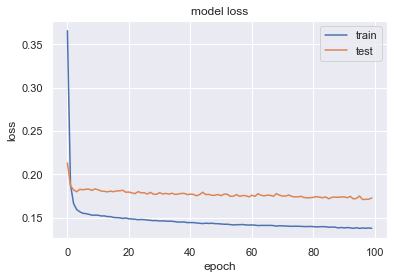

In [244]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Произведем прогноз на тестовой выборке, задав порог = 0,44 (подобран в ходе экспериментов)

In [277]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.44)

Выведем таблицу сопряженности, которая показывает, что 41 позитивных объектов распознаны как негативные, а 43
негативных определены как позитивные.

In [272]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[831  43]
 [ 41 289]]


Произведем расчет точности, доли ошибки, чувствителности и специфичности модели.

In [273]:
Accurary_rate = (289+831)/(1204)
Accurary_rate

0.9302325581395349

In [274]:
Error_rate = (41+43)/(1204)
Error_rate

0.06976744186046512

In [275]:
Se = 289/(289+41)
Se

0.8757575757575757

In [276]:
Sp = 831/(831+43)
Sp

0.9508009153318078

По сравнению с простой логистической регрессией(92,52%) модель НС имеет более высокую тосность = 93,02%. Доля ошибок снизилась с 7,47 % до 6,97%.
При этом возрасла чувстивельность с 82% до 87%, а специфичность незначительно сократилась с 96,45% до 95,08%. 

В итоге получаем  результат, который несколько лучше базовой модели.